In [2]:
# in this file we check the outputs for the single simulation
import os
import sys
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import cm

=== ELMFIRE Output Quick Check ===

✅ Fire Line Intensity: Found
✅ Time of Arrival: Found
✅ Spread Velocity: Found

📊 Reading 3 raster files...

=== FIRE LINE INTENSITY ===
Shape: (128, 128)
Min: nan
Max: nan
Mean: nan
Valid pixels: 0

=== TIME OF ARRIVAL ===
Shape: (128, 128)
Min: nan
Max: nan
Mean: nan
Valid pixels: 0

=== SPREAD VELOCITY ===
Shape: (128, 128)
Min: nan
Max: nan
Mean: nan
Valid pixels: 0



/var/folders/nq/s25wg_h92s78fqy480d8b42r0000gp/T/ipykernel_63508/1509277962.py:58: RuntimeWarning: All-NaN slice encountered
  print(f"Min: {np.nanmin(data):.2f}")
/var/folders/nq/s25wg_h92s78fqy480d8b42r0000gp/T/ipykernel_63508/1509277962.py:59: RuntimeWarning: All-NaN slice encountered
  print(f"Max: {np.nanmax(data):.2f}")
/var/folders/nq/s25wg_h92s78fqy480d8b42r0000gp/T/ipykernel_63508/1509277962.py:60: RuntimeWarning: Mean of empty slice
  print(f"Mean: {np.nanmean(data):.2f}")


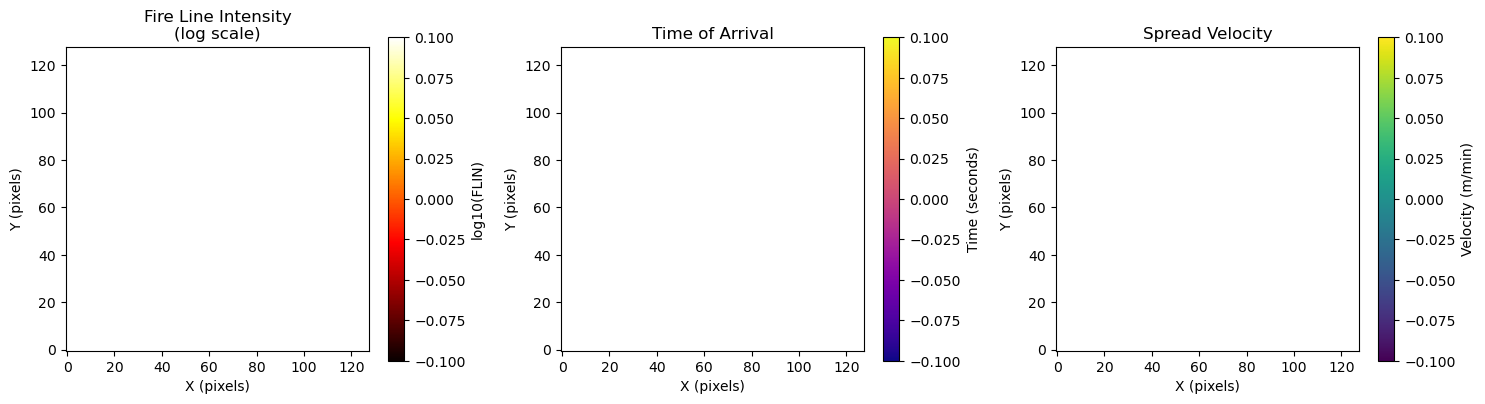

🔥 Burned Area: 0.0 acres (0 pixels)

✅ Analysis complete!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os

# Configuration - update these paths
output_dir = "./outputs"  # Change to your simulation directory
sim_number = "0000001"
time_step = "0259980"

# File paths
flin_file = os.path.join(output_dir, f"flin_{sim_number}_{time_step}.tif")
time_file = os.path.join(output_dir, f"time_of_arrival_{sim_number}_{time_step}.tif")
vs_file = os.path.join(output_dir, f"vs_{sim_number}_{time_step}.tif")

def read_and_clean_raster(filepath):
    """Read raster and handle nodata values"""
    with rasterio.open(filepath) as src:
        data = src.read(1)
        # Replace nodata with NaN
        data = np.where(data == -9999, np.nan, data)
        return data, src.meta

print("=== ELMFIRE Output Quick Check ===\n")

# Check if files exist
files_to_check = [
    ("Fire Line Intensity", flin_file),
    ("Time of Arrival", time_file), 
    ("Spread Velocity", vs_file)
]

available_files = []
for name, filepath in files_to_check:
    if os.path.exists(filepath):
        print(f"✅ {name}: Found")
        available_files.append((name, filepath))
    else:
        print(f"❌ {name}: Not found - {filepath}")

if not available_files:
    print("\n❌ No output files found! Check your paths.")
else:
    print(f"\n📊 Reading {len(available_files)} raster files...\n")
    
    # Create plots
    fig, axes = plt.subplots(1, len(available_files), figsize=(5*len(available_files), 4))
    if len(available_files) == 1:
        axes = [axes]  # Make it iterable for single plot
    
    for i, (name, filepath) in enumerate(available_files):
        # Read data
        data, meta = read_and_clean_raster(filepath)
        
        # Print statistics
        print(f"=== {name.upper()} ===")
        print(f"Shape: {data.shape}")
        print(f"Min: {np.nanmin(data):.2f}")
        print(f"Max: {np.nanmax(data):.2f}")
        print(f"Mean: {np.nanmean(data):.2f}")
        print(f"Valid pixels: {np.sum(~np.isnan(data))}")
        print()
        
        # Plot
        ax = axes[i]
        
        # Choose colormap based on variable
        if 'flin' in filepath.lower():
            # Fire line intensity - use log scale and hot colors
            data_plot = np.log10(np.maximum(data, 1))  # Avoid log(0)
            im = ax.imshow(data_plot, cmap='hot', origin='lower')
            ax.set_title(f'{name}\n(log scale)')
            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('log10(FLIN)')
        elif 'time' in filepath.lower():
            # Time of arrival - use plasma colors
            im = ax.imshow(data, cmap='plasma', origin='lower')
            ax.set_title(f'{name}')
            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('Time (seconds)')
        elif 'vs' in filepath.lower():
            # Spread velocity - use coolwarm colors
            im = ax.imshow(data, cmap='viridis', origin='lower')
            ax.set_title(f'{name}')
            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('Velocity (m/min)')
        
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate burned area
    if any('time' in fp for _, fp in available_files):
        time_data, _ = read_and_clean_raster(time_file)
        burned_pixels = np.sum(~np.isnan(time_data))
        burned_area_acres = (burned_pixels * 30 * 30) / 4047  # 30m pixels to acres
        print(f"🔥 Burned Area: {burned_area_acres:.1f} acres ({burned_pixels} pixels)")
    
    print("\n✅ Analysis complete!")

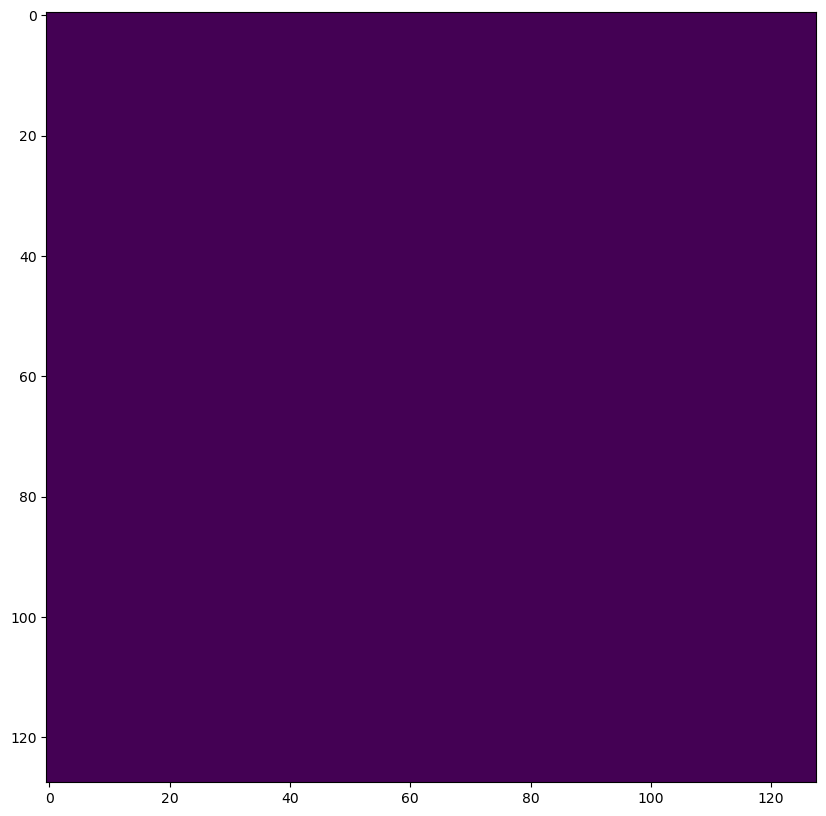

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

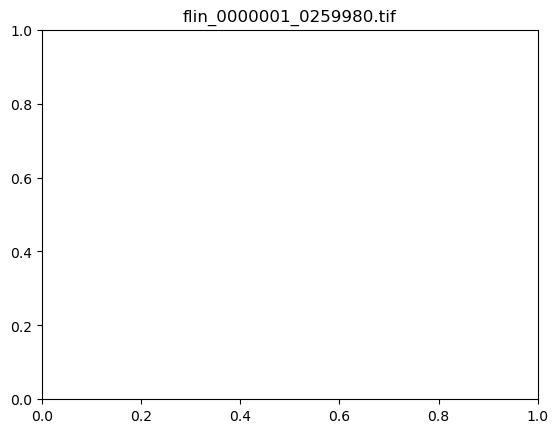

In [3]:
outpus_dir = './outputs'
# from output directory read these rasters flin_0000001_0259980.tif,
# time_of_arrival_0000001_0259980.tif, vs_0000001_0259980.tif
rasters = [
    'flin_0000001_0259980.tif',
    'time_of_arrival_0000001_0259980.tif',
    'vs_0000001_0259980.tif'
]
for raster in rasters:
    raster_path = os.path.join(outpus_dir, raster)
    with rasterio.open(raster_path) as src:
        data = src.read(1)
        plt.figure(figsize=(10, 10))
        show(data, cmap=cm.viridis)
        plt.title(raster)
        plt.colorbar()
        plt.show()
        print(f"Raster {raster} has shape {data.shape} and dtype {data.dtype}")
        print(f"Raster {raster} has min {data.min()} and max {data.max()}")
        print(f"Raster {raster} has no data value {src.nodata}")